In [1]:
import zipfile
import os

# 1. Ruta del archivo ZIP en tu PC
zip_path = r'C:\Users\victo\Desktop\IA\archive.zip'

# 2. Ruta de destino para descomprimir
extract_path = r'C:\Users\victo\Desktop\IA\Plants_2'

# 3. Descomprimir el archivo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 4. Verificar el contenido extraído
print("Contenido extraído:")
print(os.listdir(extract_path))

Contenido extraído:
['Plants_2']


In [1]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Restringe TensorFlow a solo la primera GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("Usando GPU:", gpus[0])
    except RuntimeError as e:
        print(e)
else:
    print("No se detectó GPU.")


No se detectó GPU.


In [2]:
# Ajusta según el contenido de tu archivo ZIP
data_dir = r'C:\Users\victo\Desktop\IA\Plants_2\Plants_2'
train_dir = f"{data_dir}/train"
valid_dir = f"{data_dir}/valid"
test_dir  = f"{data_dir}/test"

In [ ]:
import os
import shutil
import re
from pathlib import Path
from tqdm import tqdm

# 📁 Directorio base del dataset original
base_dir = Path(data_dir)


# 📁 Nuevo dataset organizado por forma de hoja
output_base = Path(r"C:\Users\victo\Desktop\IA\leaf_shape_dataset_organized")
output_base.mkdir(exist_ok=True)


# ✅ Diccionario especie -> forma de hoja (minúsculas para coincidir con el procesamiento)
species_to_shape = {
    "alstonia scholaris": "Lanceolada",
    "arjun": "Obovada",
    "bael": "Trifoliada",
    "basil": "Ovada",
    "chinar": "Palmeada",
    "gauva": "Ovada", 
    "jamun": "Elíptica",
    "jatropha": "Palmeada",
    "lemon": "Elíptica",
    "mango": "Lanceolada",
    "pomegranate": "Ovada",
    "pongamia pinnata": "Imparipinnada"
}

# 🔁 Procesar cada partición
splits = ["train", "test", "valid"]

for split in splits:
    split_path = base_dir / split
    for species_folder in tqdm(list(split_path.iterdir()), desc=f"Procesando {split}"):
        if not species_folder.is_dir():
            continue

        folder_name = species_folder.name
        # 🔍 Extraer nombre de especie ignorando "healthy", "diseased" y el índice (P1a)
        species_cleaned = re.sub(r'\s+(healthy|diseased)\s*\(.*\)', '', folder_name, flags=re.IGNORECASE).strip().lower()

        if species_cleaned not in species_to_shape:
            print(f"[❗️] Especie desconocida: '{species_cleaned}'")
            continue

        shape = species_to_shape[species_cleaned]
        output_dir = output_base / split / shape
        output_dir.mkdir(parents=True, exist_ok=True)

        for image_file in species_folder.glob("*.JPG"):
            shutil.copy(image_file, output_dir / image_file.name)

Procesando valid: 100%|██████████| 22/22 [00:00<00:00, 34.75it/s]


In [4]:
for split in ['train', 'test', 'valid']:
    split_dir = fr"C:\Users\victo\Desktop\IA\leaf_shape_dataset_organized\{split}"
    print(f"\n📂 Split: {split}")

    if not os.path.exists(split_dir):
        print("  [!] No se encontró esta carpeta.")
        continue

    for shape in sorted(os.listdir(split_dir)):
        shape_path = os.path.join(split_dir, shape)
        if os.path.isdir(shape_path):
            count = len([f for f in os.listdir(shape_path) if f.endswith('.JPG')])
            print(f"  🟢 {shape}: {count} imágenes")


📂 Split: train
  🟢 Elíptica: 819 imágenes
  🟢 Imparipinnada: 577 imágenes
  🟢 Lanceolada: 826 imágenes
  🟢 Obovada: 432 imágenes
  🟢 Ovada: 1073 imágenes
  🟢 Palmeada: 440 imágenes
  🟢 Trifoliada: 107 imágenes

📂 Split: test
  🟢 Elíptica: 20 imágenes
  🟢 Imparipinnada: 10 imágenes
  🟢 Lanceolada: 20 imágenes
  🟢 Obovada: 10 imágenes
  🟢 Ovada: 25 imágenes
  🟢 Palmeada: 20 imágenes
  🟢 Trifoliada: 5 imágenes

📂 Split: valid
  🟢 Elíptica: 20 imágenes
  🟢 Imparipinnada: 10 imágenes
  🟢 Lanceolada: 20 imágenes
  🟢 Obovada: 10 imágenes
  🟢 Ovada: 25 imágenes
  🟢 Palmeada: 20 imágenes
  🟢 Trifoliada: 5 imágenes


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalización y aumento de datos
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2,
                                   shear_range=0.2, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# Directorio base del dataset organizado por forma de hoja
organized_data_dir = fr"C:\Users\victo\Desktop\IA\leaf_shape_dataset_organized"

# Generadores
train_generator = train_datagen.flow_from_directory(f"{organized_data_dir}/train", target_size=(128, 128), batch_size=32, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(f"{organized_data_dir}/valid", target_size=(128, 128), batch_size=32, class_mode='categorical')
test_generator  = test_datagen.flow_from_directory(f"{organized_data_dir}/test", target_size=(128, 128), batch_size=32, class_mode='categorical', shuffle=False)

Found 4274 images belonging to 7 classes.
Found 110 images belonging to 7 classes.
Found 110 images belonging to 7 classes.


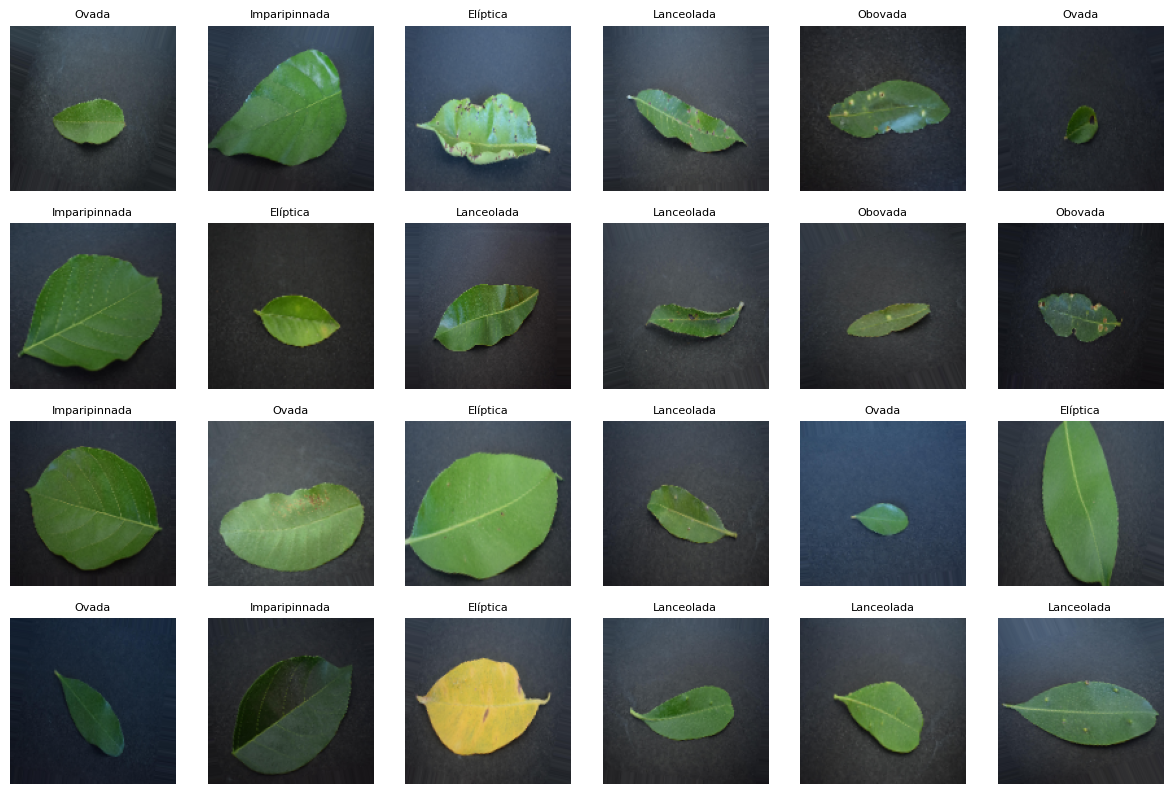

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener un lote de imágenes y etiquetas del generador
images, labels = next(train_generator)

# Obtener nombres de las clases
class_names = list(train_generator.class_indices.keys())

# Mostrar imágenes con sus etiquetas, limitadas al tamaño del lote
num_images_to_display = min(24, images.shape[0]) # Get the minimum between 36 and the actual number of images in the batch

plt.figure(figsize=(12, 12))
for i in range(num_images_to_display):
    plt.subplot(6, 6, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    label_index = np.argmax(labels[i])
    plt.title(class_names[label_index], fontsize=8)
plt.tight_layout()
plt.show()

In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras import layers, optimizers

# Cargar la base preentrenada sin la parte superior (fully connected layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Congelar las capas convolucionales

# Añadir tus propias capas de clasificación encima
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Crear el modelo completo
model = Model(inputs=base_model.input, outputs=outputs)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_generator, epochs=10, validation_data=valid_generator)

# (Opcional) Descongelar algunas capas del modelo base y reentrenar con un learning rate más bajo
base_model.trainable = True
# Congelamos las primeras N capas si queremos
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(optimizer=optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(train_generator, epochs=10, validation_data=valid_generator)

# Evaluación final
score = model.evaluate(test_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Epoch 1/10
134/134 [==============================] - ETA: 0s - loss: 0.6540 - accuracy: 0.7883WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000020BD4AECA40> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x0000020BD4AECA40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x0000020BD4AECA40>. Note that functions defined in certain environments, like the inter

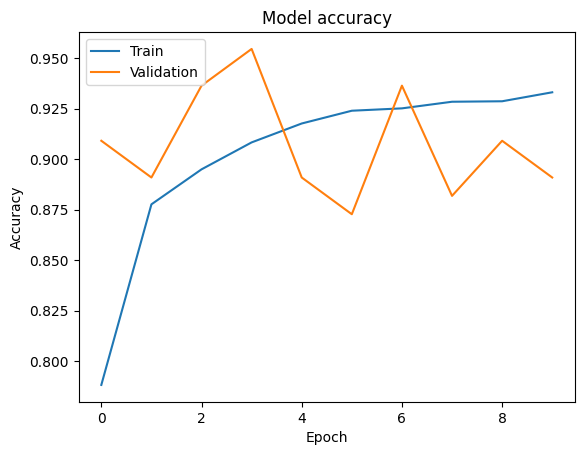

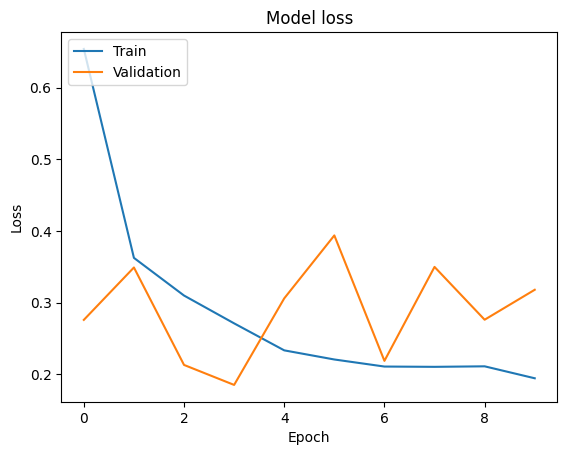

In [9]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


4/4 [==============================] - 9s 2s/step


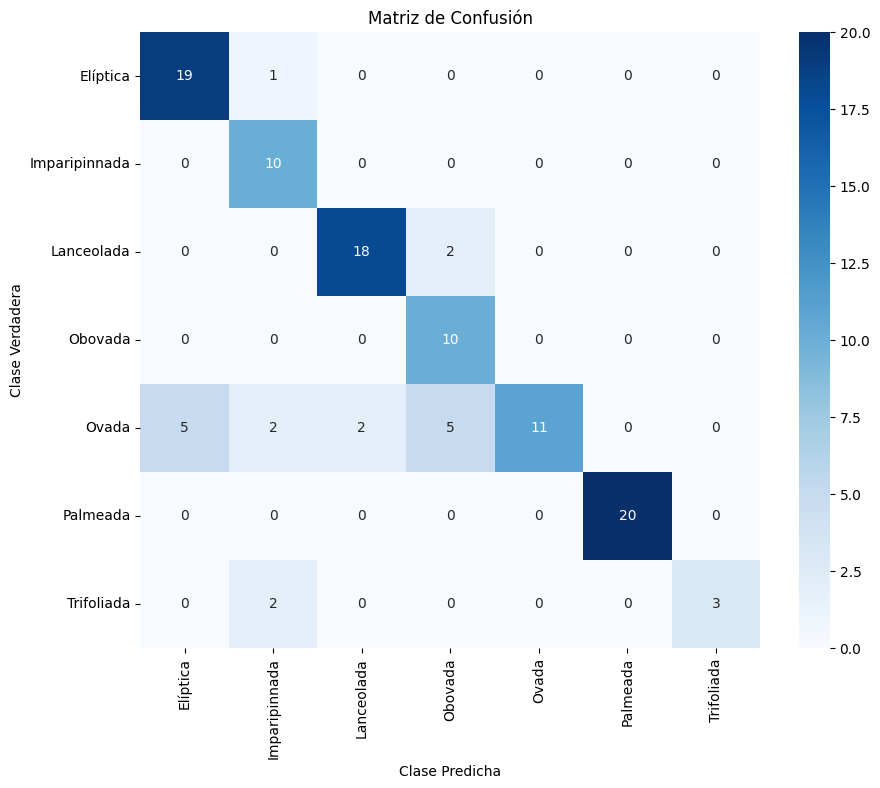

In [13]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener las predicciones en el conjunto de prueba
test_generator.reset() # Reiniciar el generador para asegurar el orden
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las etiquetas verdaderas
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Crear la matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes)

# Mostrar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión')
plt.show()


1/1 [==============================] - 1s 967ms/step


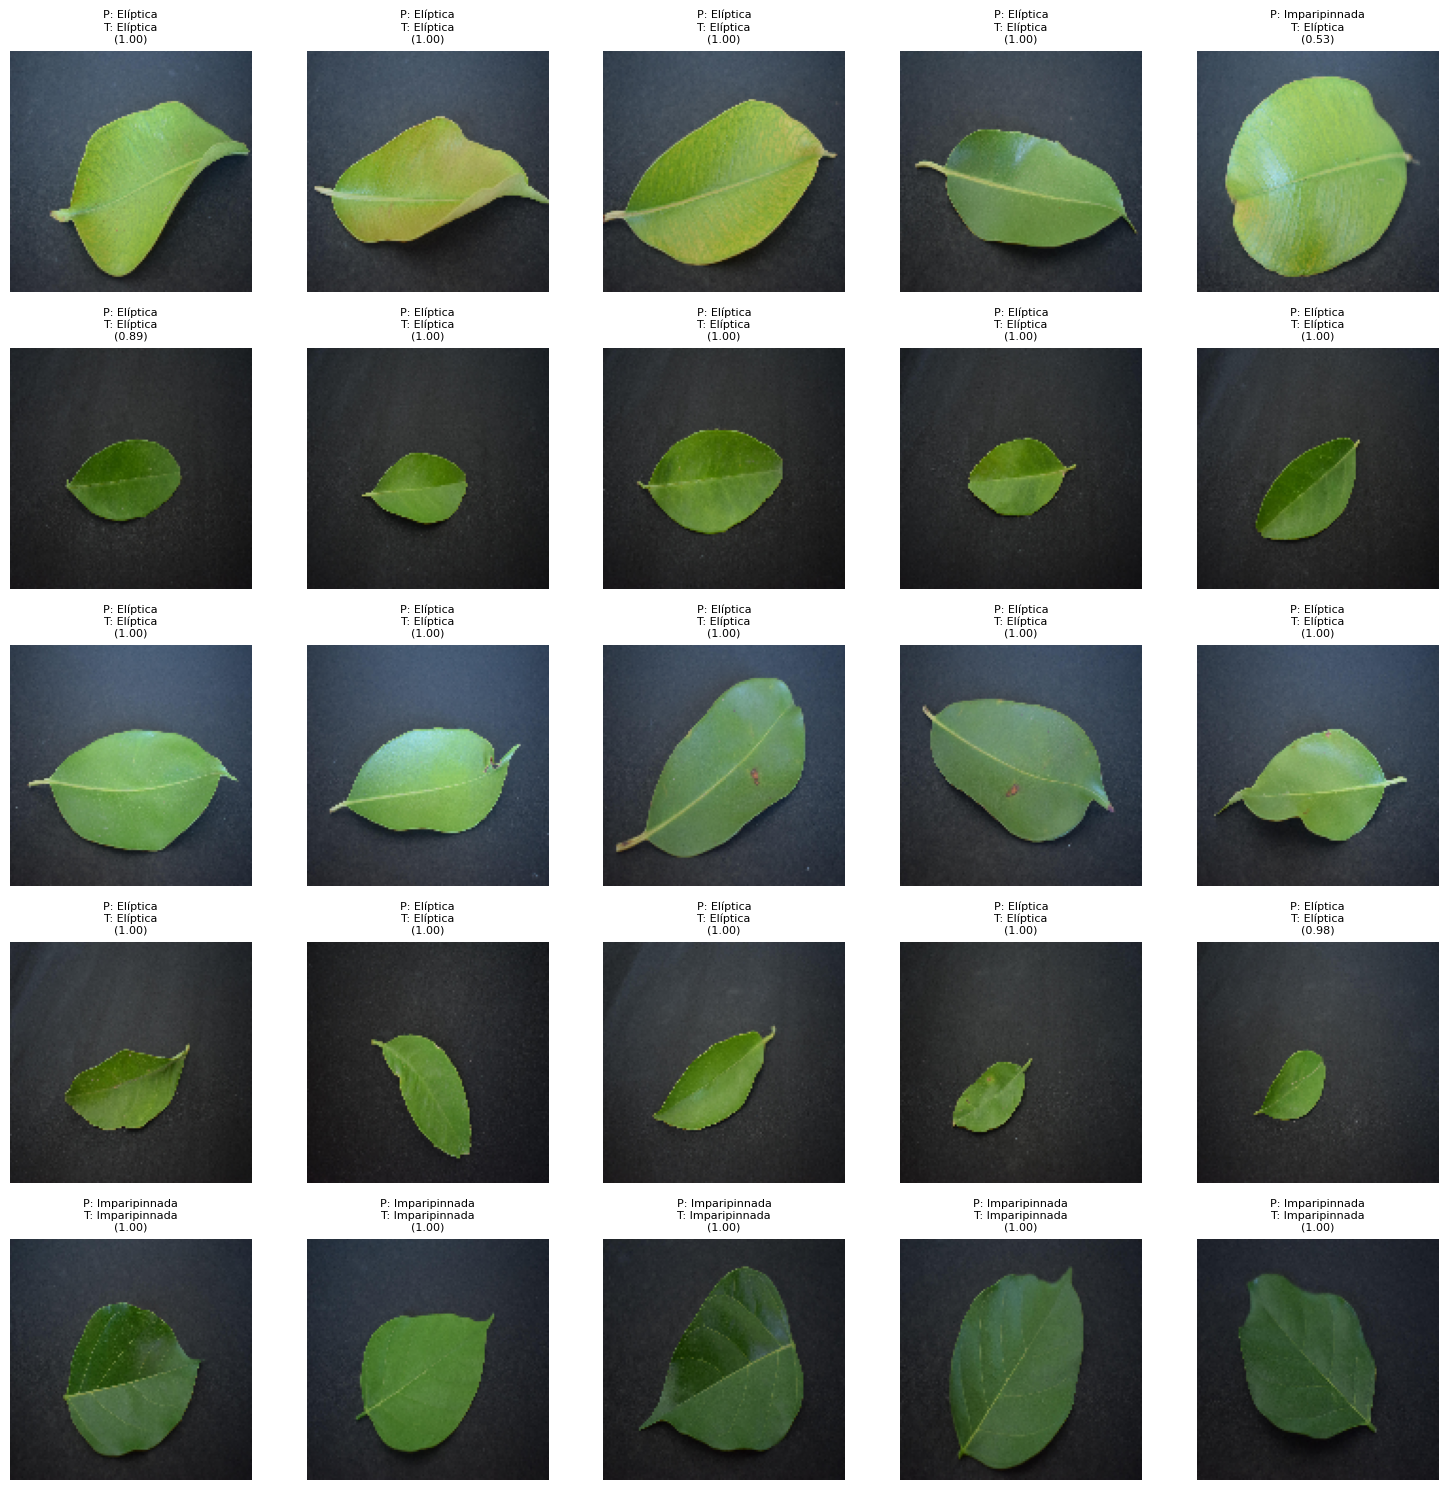

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener una tanda de imágenes desde el generador
images, labels = next(test_generator)

# Hacer predicciones sobre ese batch
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')

    pred_label = class_names[predicted_classes[i]]
    true_label = class_names[true_classes[i]]
    confidence = np.max(predictions[i])

    title = f"P: {pred_label}\nT: {true_label}\n({confidence:.2f})"
    plt.title(title, fontsize=8)
plt.tight_layout()
plt.show()


In [15]:
model.save("modelo_hojas.h5")

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
